In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = 'BigEarthNet'
# dataset = 'EuroSAT'
dataset = 'So2Sat'
models = []
names = []
models += ['vit_base_patch16_224']
models += ['cvit_base_patch16_224']
# names += ['mae_base_vit']
# names += ['mae_base_cvit']
names += ['mae_base']
names += ['mae_vit_btnk']
metric = 'mAP' if dataset == 'BigEarthNet' else 'image_acc'

In [10]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/ft_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

,epochs,lr,weight_decay,ce,loss,image_acc,epoch,num_samples,model
0,10,0.000030,0.005,1.811037,1.811037,0.410934,10,48307,mae_base
1,10,0.000005,0.005,1.653494,1.653494,0.470863,10,48307,mae_base
2,10,0.000500,0.005,1.387497,1.387497,0.558511,10,48307,mae_base
3,10,0.000010,0.005,1.258534,1.258534,0.578218,10,48307,mae_base
4,10,0.000050,0.005,1.147270,1.147270,0.604923,10,48307,mae_base
5,10,0.000070,0.005,1.158151,1.158151,0.606248,10,48307,mae_base
6,10,0.000100,0.005,1.144948,1.144948,0.615894,10,48307,mae_base
7,10,0.000005,0.005,1.550438,1.550438,0.498851,10,48307,mae_vit_btnk
8,10,0.000500,0.005,1.554831,1.554831,0.563624,10,48307,mae_vit_btnk
9,10,0.000010,0.005,1.224352,1.224352,0.575796,10,48307,mae_vit_btnk


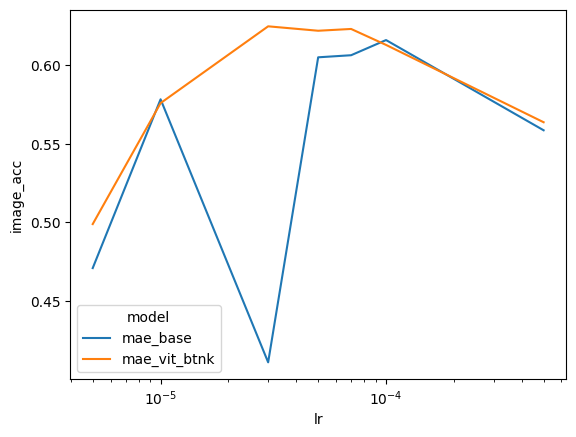

In [11]:
sns.lineplot(data=df_all.loc[df_all.weight_decay==5e-3], x='lr', y=metric, hue='model')
# set x axis log scale
plt.xscale('log')

In [10]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

,epochs,lr,weight_decay,ce,loss,image_acc,epoch,num_samples,model
0,100,0.001,0,0.955895,0.955895,0.693704,100,5400,mae_base_vit
1,100,0.010,0,0.707261,0.707261,0.763148,100,5400,mae_base_vit
2,100,0.090,0,0.633019,0.633019,0.780926,100,5400,mae_base_vit
3,100,0.050,0,0.649491,0.649491,0.783519,100,5400,mae_base_vit
4,100,0.001,0,0.783834,0.783834,0.765741,100,5400,mae_base_cvit
5,100,0.010,0,0.487425,0.487425,0.842407,100,5400,mae_base_cvit
6,100,0.050,0,0.426117,0.426117,0.861481,100,5400,mae_base_cvit
7,100,0.090,0,0.402724,0.402724,0.866667,100,5400,mae_base_cvit


<Axes: xlabel='lr', ylabel='image_acc'>

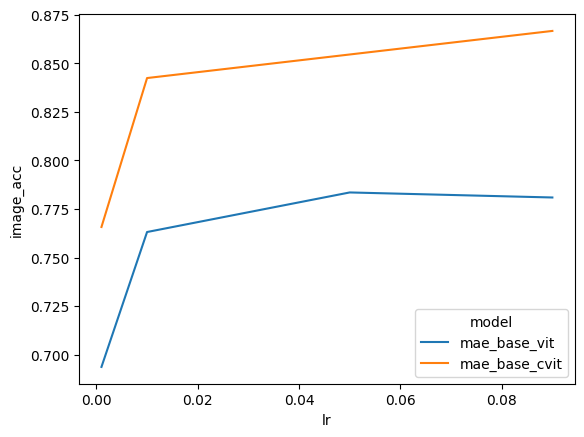

In [25]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')